In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy import stats
%matplotlib inline

In [87]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [57]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [128]:
education_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [88]:
#Replace nan values with mean values by state
df2 = education_df.copy(deep=True)

states = education_df['STATE'].unique()
variables = ['ENROLL', 'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 
             'LOCAL_REVENUE','TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 
             'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G','GRADES_4_G', 
             'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G','GRADES_9_12_G', 'GRADES_ALL_G']
        
for variable in variables:
    for state in states:
        df2.loc[df2['STATE'] == state, variable].fillna(df2[education_df['STATE'] == state][variable].mean(),inplace=True)

In [129]:
#Replace nan values with interpolated values by state/year

avg_variables = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for variable in avg_variables:
    for state in states:
        df2.loc[df2['STATE'] == state, variable] = df2.loc[df2['STATE'] == state, variable].interpolate(method='linear')

# 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [90]:
df2.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,1277.000000,1273.000000,1250.000000,1097.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,232.814597,277.190134,218.415385,263.449974
std,NaN,NaN,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.624230,10.360192,7.925924,5.793772
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,226.521892,271.201400,214.240213,259.838592
50%,NaN,NaN,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,234.531807,278.991890,220.066145,264.319646
75%,NaN,NaN,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,240.979792,284.092212,223.838858,267.490028


What is most interesting to me about this data is the massive range of the distributions between states for enrollment, revenue, and expenditures.

# 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

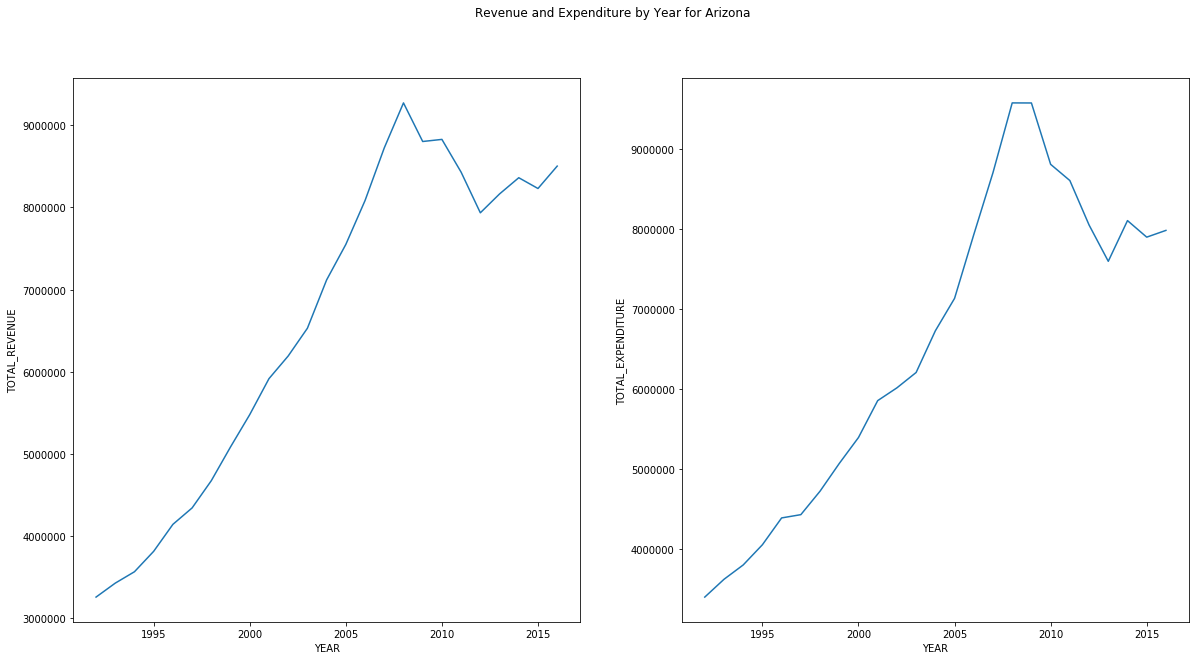

In [130]:
fig, axes = plt.subplots(1,2, figsize=(20,10))


sns.lineplot(y='TOTAL_REVENUE', 
             x='YEAR',
             data=df2[education_df['STATE']=='ARIZONA'],
            ax=axes[0])

sns.lineplot(y='TOTAL_EXPENDITURE', 
             x='YEAR',
             data=df2[education_df['STATE']=='ARIZONA'], 
             ax=axes[1])

plt.suptitle('Revenue and Expenditure by Year for Arizona')
plt.show()

Starting in 2009, budget cuts to education began in AZ. This can clearly be seen in the revenue plot. More can be read about this here- https://azsba.org/arizonas-unrestored-budget-cuts/

# 3. In your chosen state, in which of the lessons are the students more successful, math or reading?

In [92]:
df2[df2['STATE']=='ARIZONA'][avg_variables].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,26.000000,26.000000,26.000000
mean,227.217688,273.902179,209.258986,264.253350
std,8.373868,5.593414,3.384581,4.200392
min,215.253932,265.366278,205.347275,254.799747
25%,218.245697,269.472656,206.391069,261.770402
50%,229.578354,273.523155,208.169725,263.740321
75%,233.970429,278.820849,212.094327,267.648482
max,240.304911,282.919489,215.465952,270.966172


Both the Math_4 and Math_8 mean scores are higher then their corresponding reading scores. A quick ttest will confirm if AZ students are more succesful in math.

In [93]:
print('T-test comparing average grade 4 Math and Reading Scores\n')
print(stats.ttest_ind(df2[df2['STATE']=='ARIZONA']['AVG_MATH_4_SCORE'],
         df2[df2['STATE']=='ARIZONA']['AVG_READING_4_SCORE']))

print('\nT-test comparing average grade 8 Math and Reading Scores\n')
print(stats.ttest_ind(df2[df2['STATE']=='ARIZONA']['AVG_MATH_8_SCORE'],
         df2[df2['STATE']=='ARIZONA']['AVG_READING_8_SCORE']))

T-test comparing average grade 4 Math and Reading Scores

Ttest_indResult(statistic=10.138591310863811, pvalue=1.0096783424371643e-13)

T-test comparing average grade 8 Math and Reading Scores

Ttest_indResult(statistic=7.033566131643766, pvalue=5.3175148328294776e-09)


# 4. What are the distributions of the math and reading scores in the sample?

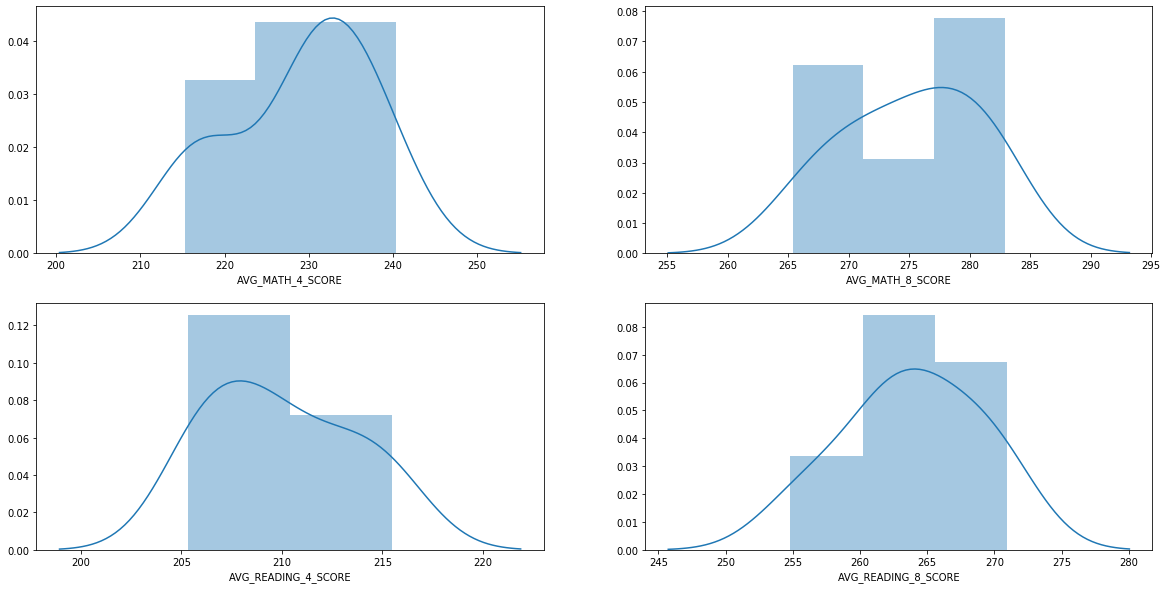

In [97]:
#Note that question 5 asks to compare how imputing data changes the distribution, so I will plot the raw data here

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(education_df[education_df['STATE']=='ARIZONA']['AVG_MATH_4_SCORE'].dropna())

plt.subplot(2,2,2)
sns.distplot(education_df[education_df['STATE']=='ARIZONA']['AVG_MATH_8_SCORE'].dropna())

plt.subplot(2,2,3)
sns.distplot(education_df[education_df['STATE']=='ARIZONA']['AVG_READING_4_SCORE'].dropna())

plt.subplot(2,2,4)
sns.distplot(education_df[education_df['STATE']=='ARIZONA']['AVG_READING_8_SCORE'].dropna())

plt.show()

# 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

In [131]:
#Impute missing values with mean values for the state

mean_df = education_df[education_df['STATE']=='ARIZONA'][avg_variables].copy(deep=True)

for variable in avg_variables:
    mean_df.loc[:,variable] = mean_df[variable].fillna(mean_df[variable].mean())

In [132]:
#Impute missing values with median values for the state

median_df = education_df[education_df['STATE']=='ARIZONA'][avg_variables].copy(deep=True)

for variable in avg_variables:
    median_df.loc[:,variable] = median_df[variable].fillna(median_df[variable].median())

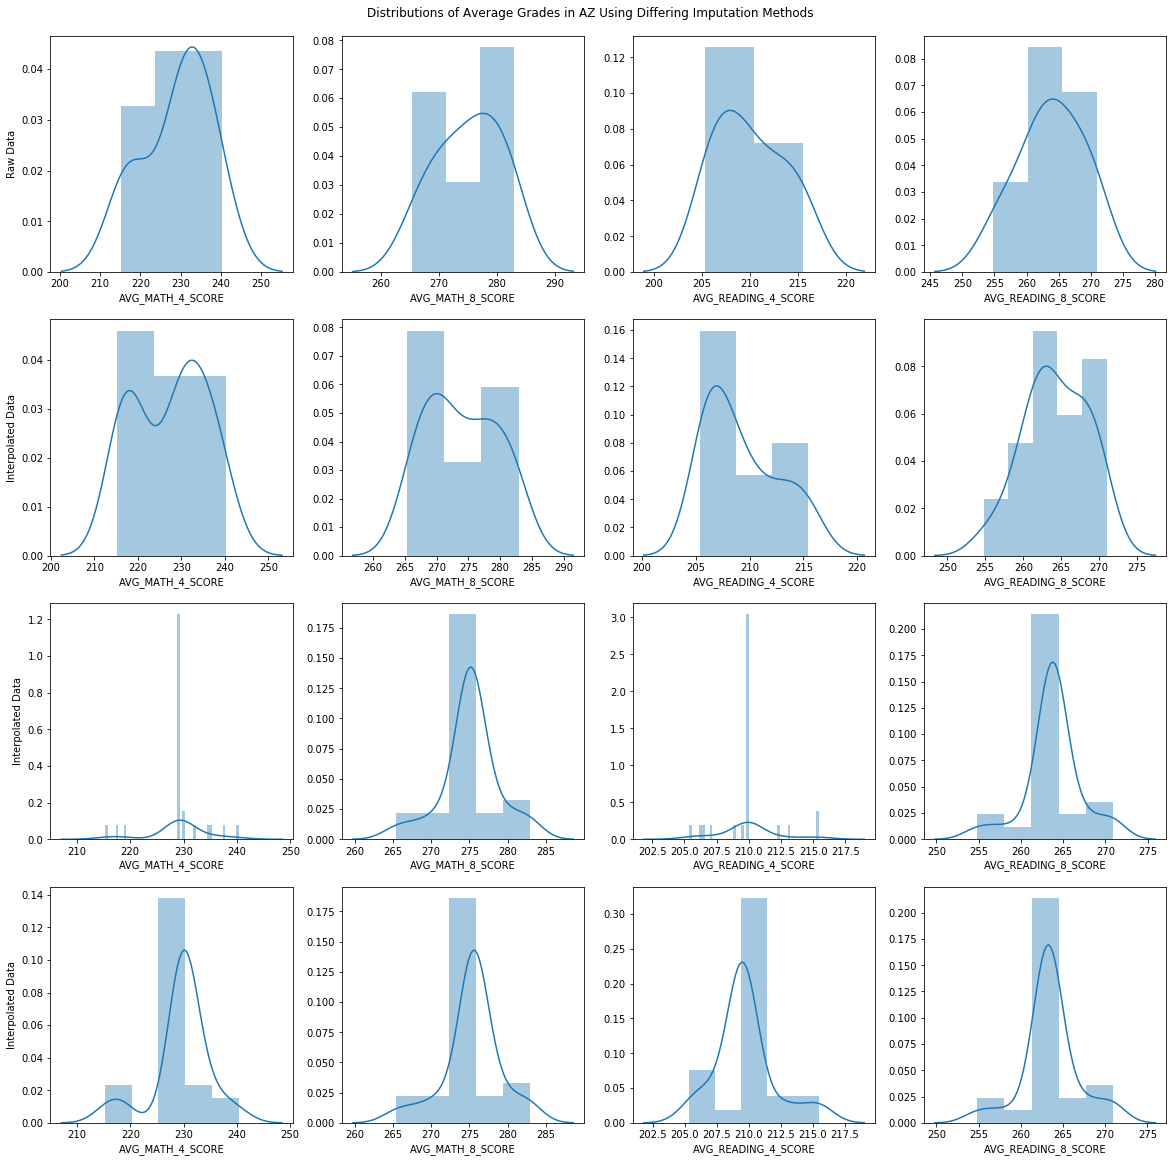

In [133]:
#Create plots of the different distributions, note than df2 has already been interpolated

fig, axes = plt.subplots(4,4,figsize=(20,20))

#Raw data

sns.distplot(education_df[education_df['STATE']=='ARIZONA']['AVG_MATH_4_SCORE'].dropna(), ax=axes[0,0])
axes[0,0].set_ylabel('Raw Data')

sns.distplot(education_df[education_df['STATE']=='ARIZONA']['AVG_MATH_8_SCORE'].dropna(), ax=axes[0,1])

sns.distplot(education_df[education_df['STATE']=='ARIZONA']['AVG_READING_4_SCORE'].dropna(), ax=axes[0,2])

sns.distplot(education_df[education_df['STATE']=='ARIZONA']['AVG_READING_8_SCORE'].dropna(), ax=axes[0,3])

#Interpolated data

sns.distplot(df2[df2['STATE']=='ARIZONA']['AVG_MATH_4_SCORE'].dropna(), ax=axes[1,0])
axes[1,0].set_ylabel('Interpolated Data')

sns.distplot(df2[df2['STATE']=='ARIZONA']['AVG_MATH_8_SCORE'].dropna(), ax=axes[1,1])

sns.distplot(df2[df2['STATE']=='ARIZONA']['AVG_READING_4_SCORE'].dropna(), ax=axes[1,2])

sns.distplot(df2[df2['STATE']=='ARIZONA']['AVG_READING_8_SCORE'].dropna(), ax=axes[1,3])

# Mean data

sns.distplot(mean_df['AVG_MATH_4_SCORE'].dropna(), ax=axes[2,0])
axes[2,0].set_ylabel('Interpolated Data')

sns.distplot(mean_df['AVG_MATH_8_SCORE'].dropna(), ax=axes[2,1])

sns.distplot(mean_df['AVG_READING_4_SCORE'].dropna(), ax=axes[2,2])

sns.distplot(mean_df['AVG_READING_8_SCORE'].dropna(), ax=axes[2,3])

# Median data

sns.distplot(median_df['AVG_MATH_4_SCORE'].dropna(), ax=axes[3,0])
axes[3,0].set_ylabel('Interpolated Data')

sns.distplot(median_df['AVG_MATH_8_SCORE'].dropna(), ax=axes[3,1])

sns.distplot(median_df['AVG_READING_4_SCORE'].dropna(), ax=axes[3,2])

sns.distplot(median_df['AVG_READING_8_SCORE'].dropna(), ax=axes[3,3])

plt.suptitle('Distributions of Average Grades in AZ Using Differing Imputation Methods', y=0.9)
plt.show()